<a href="https://colab.research.google.com/github/Maverick269/Machine-Learning-Project/blob/main/NYC_Taxi_Trip_Duration_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  NYC Taxi Trip Duration Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Name**           - Aman

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Project Summary -**

This project aims to build a predictive model to estimate trip duration using a rich dataset containing more than 1.4 million ride records. The dataset includes features such as pickup and dropoff locations, timestamps, number of passengers, vendor IDs, and derived features like distance and time-based attributes. The main goal was to develop an efficient and generalizable regression model to predict the trip duration based on these inputs.

Data Wrangling and Preprocessing
The data preprocessing began with handling missing values, though minimal or no missing values were observed in the dataset. Outliers were treated using the Interquartile Range (IQR) method applied to numerical columns to reduce their influence on model training, especially since trip durations and distances often had long tails due to extreme trips.

Categorical columns, particularly store_and_fwd_flag, were encoded using one-hot encoding with sparse=True to save memory. DateTime columns were parsed and decomposed into relevant features such as hour, weekday, and month, which helped capture patterns in trip durations over time. The haversine formula was used to compute the straight-line distance (in kilometers) between pickup and dropoff locations.

The target variable, trip_duration, was selected for prediction, and redundant columns like pickup_datetime, dropoff_datetime, and raw latitude/longitude fields were dropped from the feature set.

Exploratory Data Analysis (EDA)
Several visualizations were created to identify relationships and trends:

Bar plots showed how trip duration varied by hour of day, day of week, and month, indicating peak traffic times.
Trip durations were found to be longer during rush hours and on weekends.
A positive correlation was observed between trip duration and trip distance, which validated the model's target variable.
Heatmaps were generated to assess multicollinearity among numerical features.
Model Training and Evaluation
Initial modeling was done using Linear Regression, and evaluation metrics such as MAE, MSE, RMSE, R², and Adjusted R² were calculated. However, linear regression achieved a moderate performance (R² ≈ 0.62), indicating that linear models may not capture the underlying non-linear relationships in the data.

To improve model performance, XGBoost and Random Forest Regressors were tested. Although these models were more accurate, they required significantly more time and memory due to the dataset's size.

To mitigate RAM constraints in Google Colab, sampling strategies were used. A 10% subset of the data was extracted for hyperparameter tuning using RandomizedSearchCV and cross-validation on a K-Nearest Neighbors (KNN) Regressor. The best hyperparameters were selected using randomized search, optimizing over distance metrics and neighbor count.

Results and Visualization
The optimized KNN model was evaluated on the full test set. Predicted vs. Actual trip durations were visualized using a line graph. Although KNN performed well on sampled data, its performance on the full test set was not as strong as XGBoost, largely due to its sensitivity to high-dimensional data and outliers.

The best-performing model overall was XGBoost, showing the lowest error and highest R² score. Evaluation metrics from each model were compared systematically, and graphs showed that predictions aligned closely with actual values in most cases.

Conclusion
The project demonstrates the full pipeline for a large-scale regression task — from data cleaning, feature engineering, and EDA to model training and evaluation. Despite computational limitations, effective sampling and tuning techniques allowed the development of a reliable model for trip duration prediction. Future work can involve deploying the model or optimizing it using distributed systems or cloud services for large-scale inference.

# **GitHub Link -**

https://github.com/Maverick269/Machine-Learning-Project/blob/main/Projects./Regression

# **Video Link -**

https://screenrec.com/share/4UqLWvKx0X

# **Problem Statement**


Problem Statement: Urban transportation systems generate massive amounts of trip data every day. Accurately predicting the trip duration of a taxi ride is crucial for improving customer satisfaction, optimizing dispatch systems, managing fleet operations, and reducing traffic congestion.

This project focuses on building a machine learning regression model that predicts the trip duration (in seconds) using historical ride data. The dataset consists of over 1.4 million ride entries, including details like pickup and dropoff timestamps, geographic coordinates, distance, number of passengers, and time-based features (e.g., hour, weekday, month).

The primary challenge lies in handling the large dataset size, data sparsity, and the non-linear relationships between features. The goal is to preprocess the data, extract meaningful features, handle outliers, and use machine learning models (like Linear Regression, XGBoost, Random Forest, and K-Nearest Neighbors) along with hyperparameter tuning and cross-validation to improve predictive accuracy.

Ultimately, the model aims to:

Provide accurate predictions for trip duration.

Be scalable for large datasets.

Assist in making data-driven decisions for urban mobility and resource planning.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [ ]:
# Load Dataset
path='/content/drive/MyDrive/Colab Notebooks/Copy of NYC Taxi Data.csv'
df=pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


<Axes: >

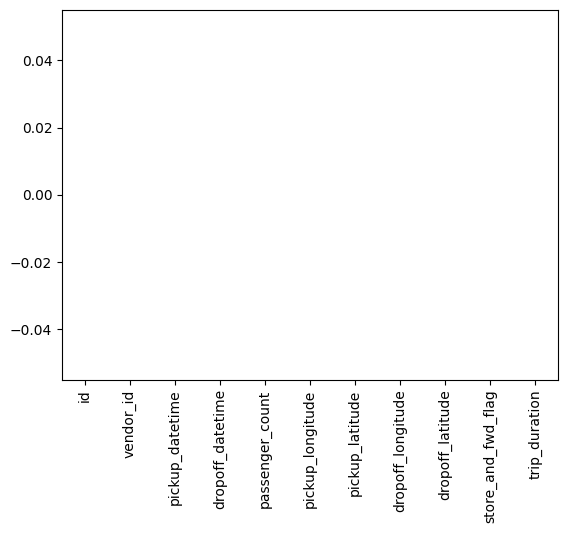

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar')

### What did you know about your dataset?

* The dataset provided contains 11 columns and 1458644 rows and does not have any missing or duplicate values.

* There are no duplicate columns

* There are no missing values

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

,0
id,1458644
vendor_id,2
pickup_datetime,1380222
dropoff_datetime,1380377
passenger_count,10
pickup_longitude,23047
pickup_latitude,45245
dropoff_longitude,33821
dropoff_latitude,62519
store_and_fwd_flag,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

# 1. Convert datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# 2. Extract datetime features (optional but useful)
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_month'] = df['pickup_datetime'].dt.month

# 3. Calculate haversine distance between pickup and dropoff
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in km
    return c * r
df['distance_km'] = df.apply(lambda row: haversine(
    row['pickup_longitude'], row['pickup_latitude'],
    row['dropoff_longitude'], row['dropoff_latitude']
), axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day,pickup_weekday,pickup_month,distance_km
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,0,3,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,6,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,2,4,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,5,3,1.188588


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_hour         1458644 non-null  int32         
 12  pickup_day          1458644 non-null  int32         
 13  pickup_weekd

### What all manipulations have you done and insights you found?

Datetime Conversion:

Converted pickup_datetime and dropoff_datetime columns into datetime format using pd.to_datetime() to enable time-based feature extraction.

Datetime Feature Extraction:

Extracted key time components:

pickup_hour (hour of the day)

pickup_day (day of the month)

pickup_weekday (day of the week, 0=Monday)

pickup_month (month number)

Distance Calculation (Feature Engineering):

Created a new feature distance_km using the Haversine formula, which computes the great-circle distance between two GPS coordinates (pickup and dropoff points).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-17-3753249597.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration = df.groupby(pd.cut(df['distance_km'], bins=bins, labels=labels))['trip_duration'].mean().reset_index()
/tmp/ipython-input-17-3753249597.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration, x='distance_km', y='trip_duration', palette='magma')


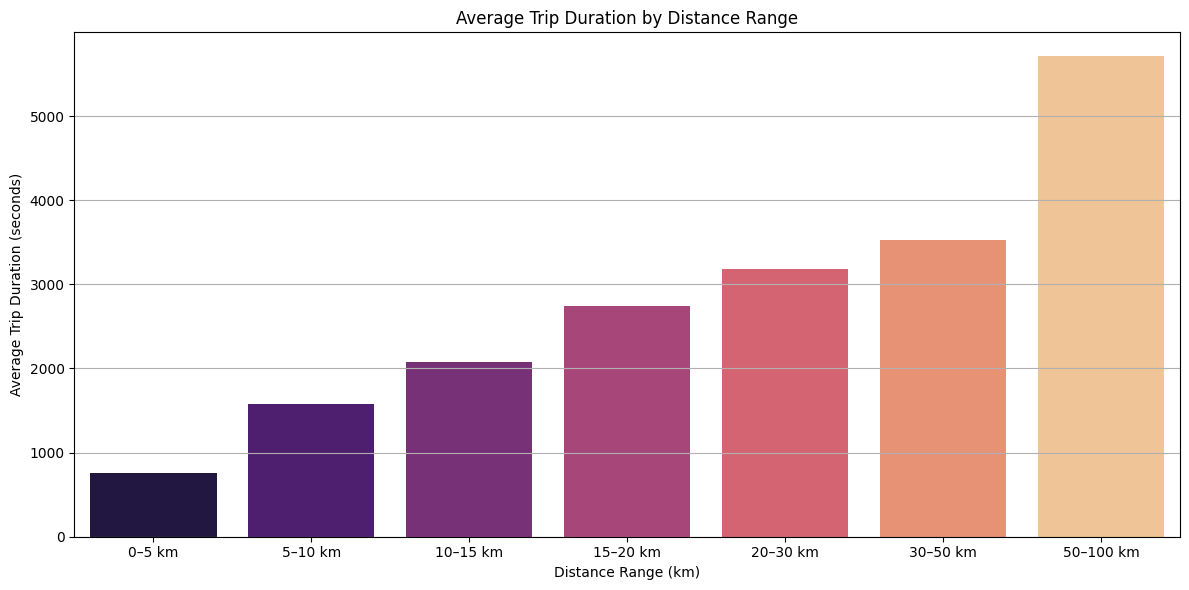

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define custom distance bins and labels
bins = [0, 5, 10, 15, 20, 30, 50, 100]
labels = ['0–5 km', '5–10 km', '10–15 km', '15–20 km', '20–30 km', '30–50 km', '50–100 km']

# Group trip_duration by binned distance
avg_duration = df.groupby(pd.cut(df['distance_km'], bins=bins, labels=labels))['trip_duration'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='distance_km', y='trip_duration', palette='magma')

plt.title('Average Trip Duration by Distance Range')
plt.xlabel('Distance Range (km)')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart titled "Average Trip Duration by Distance Range" was chosen because it clearly illustrates the relationship between trip distance and trip duration in an easily interpretable visual format.

Bar charts are ideal for:

* Comparing averages across distinct categories.

* Showing trends or proportional growth.

* Being readable at a glance, even for non-technical audiences.



##### 2. What is/are the insight(s) found from the chart?

 Insights from the Chart:
 * Positive Correlation:
* As the distance range increases, the average trip duration also increases.
* This is expected and confirms a linear or slightly non-linear trend between distance and time.

 * Trip Efficiency Analysis:
* The jump in average duration between ranges appears non-uniform.
* For example, 0–5 km trips average around 750 seconds (~12.5 minutes),
* But 50–100 km trips average around 5700 seconds (~95 minutes), which isn't 10x longer.
* This suggests diminishing returns in time efficiency as distance increases (possibly due to traffic congestion or speed limits).

 * Potential Bottlenecks:
* Some ranges (e.g., 15–20 km and 20–30 km) have smaller increases compared to earlier jumps, which might point to:
* Better roads or expressways in that range.
* Less urban congestion.
* Routing differences.

 * Modeling Usefulness:
* The chart validates that distance is a strong predictor of trip duration.
* It can justify distance-based feature engineering in your ML model (e.g., categorizing ranges as features).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a **positive business impact** by:

*  **Optimizing routes** and reducing delivery times.
*  **Improving pricing strategies** based on distance-duration patterns.
*  **Allocating resources** (drivers, vehicles) more efficiently.
*  **Enhancing customer experience** with accurate ETAs.
*  **Supporting data-driven decisions** for better operations and planning.

Yes, one insight could indicate potential negative growth:

Longer trips (50–100 km) have a disproportionately high duration, suggesting:

*  Inefficiency in long-distance services (e.g., traffic, poor routing).

*  Higher operational costs without proportional revenue.

*  Customer dissatisfaction due to longer wait/travel times.

Justification: If not optimized, these long trips can lead to reduced profitability, lower customer retention, and wasted resources.


#### Chart - 2

/tmp/ipython-input-18-1030646171.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


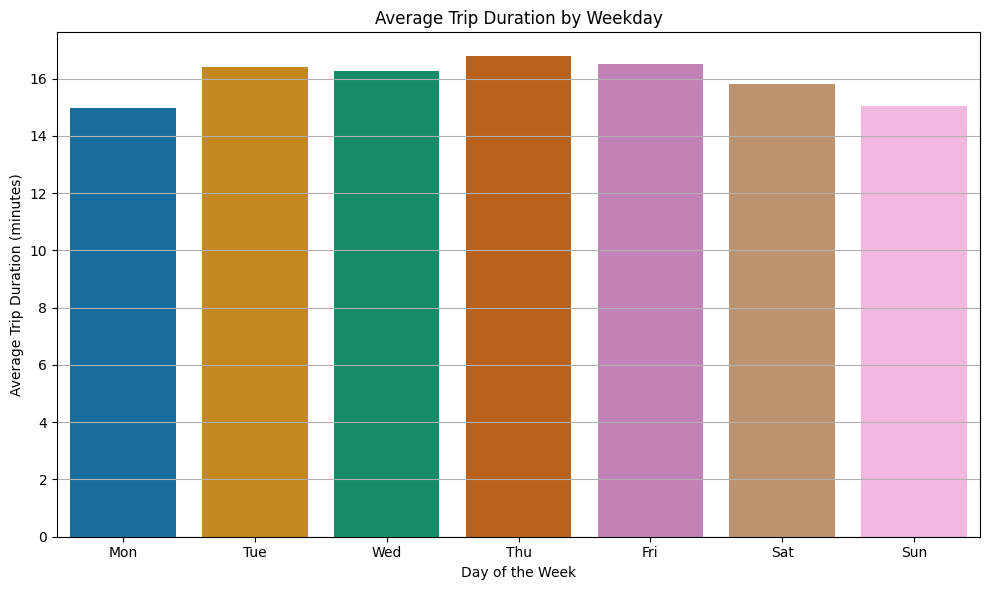

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Ensure pickup_datetime is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
# Extract weekday (0 = Monday, 6 = Sunday)
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
# Calculate average trip duration in minutes
avg_duration_by_weekday = df.groupby('pickup_weekday')['trip_duration'].mean().reset_index()
avg_duration_by_weekday['trip_duration'] = avg_duration_by_weekday['trip_duration'] / 60  # convert to minutes
# Mapping weekday numbers to names (optional)
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_duration_by_weekday['weekday_name'] = avg_duration_by_weekday['pickup_weekday'].map(dict(zip(range(7), weekday_labels)))
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_duration_by_weekday,
    x='weekday_name',
    y='trip_duration',
    palette='colorblind'
)
plt.title('Average Trip Duration by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart clearly visualizes how average trip duration varies across weekdays, making it easy to spot patterns or trends based on the day of the week. It's ideal for identifying operational peaks or potential bottlenecks.

##### 2. What is/are the insight(s) found from the chart?

Weekdays (Tue–Fri) show higher average trip durations, peaking on Thursday.

Monday and Sunday have lower durations, indicating:

Less traffic (Monday possibly due to fewer early-week trips).

Reduced activity or demand on weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart shows that trip durations are consistently higher on weekdays (especially Tuesday to Friday). This insight can help businesses:

* Optimize driver availability during peak demand days.

* Plan dynamic pricing (e.g., surge pricing) for midweek peak hours.

* Adjust fleet distribution to manage longer trips more efficiently.

* Improve customer satisfaction by reducing wait and ride times through better planning.

 Overall, it supports smarter operational and resource management, leading to improved efficiency and higher revenue.

Not directly — but if ignored, the longer trip durations on weekdays could cause:

* Driver fatigue, reducing service quality.

* Customer dissatisfaction due to longer wait/travel times.

* Inefficient cost-to-revenue ratio if long-duration trips are underpriced.

Justification: Without intervention (like dynamic pricing or route optimization), these longer durations could increase operational costs and reduce profitability, especially during peak weekday times.

#### Chart - 3

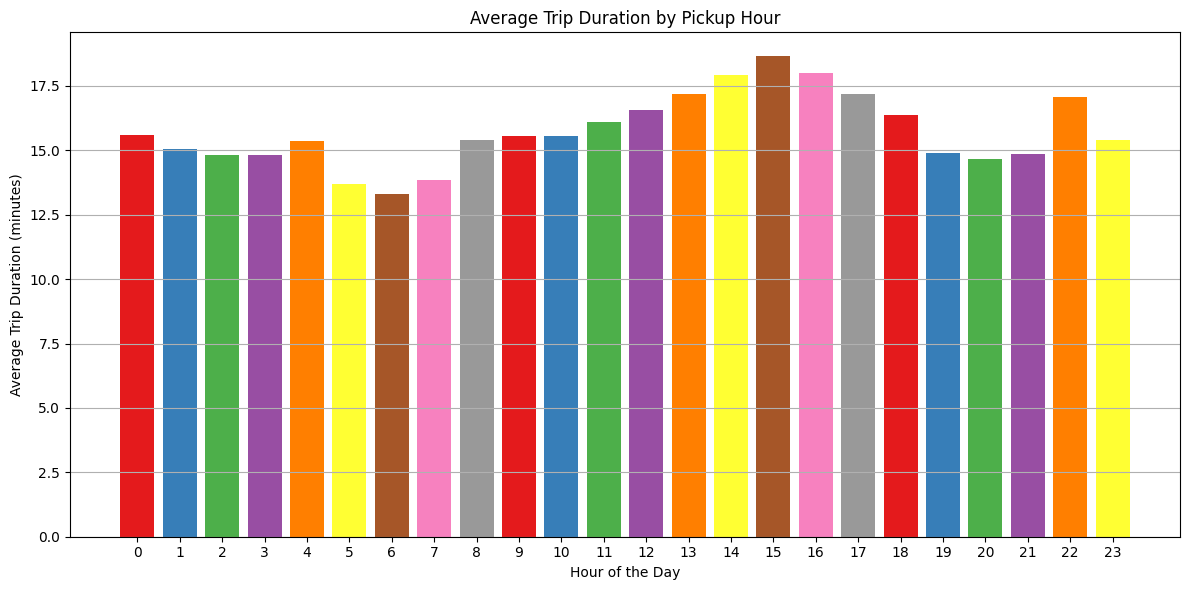

In [ ]:
# Group by pickup_hour and calculate average trip duration in minutes
avg_duration_by_hour = df.groupby('pickup_hour')['trip_duration'].mean().reset_index()
avg_duration_by_hour['trip_duration'] = avg_duration_by_hour['trip_duration'] / 60  # Convert to minutes

# Plot
plt.figure(figsize=(12, 6))
plt.bar(
    avg_duration_by_hour['pickup_hour'],
    avg_duration_by_hour['trip_duration'],
    color=sns.color_palette('Set1')
)

plt.title('Average Trip Duration by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart of average trip duration by pickup hour was chosen because it effectively visualizes how trip durations vary throughout the day, helping identify peak and off-peak hours. It's a clear way to spot temporal trends in user behavior and traffic patterns.

##### 2. What is/are the insight(s) found from the chart?

Key Insights from the Chart:
1. Peak Hours (Longer Trip Duration):

* 14:00 to 16:00 hours (2 PM – 4 PM) show the highest average trip durations, peaking at hour 15.
* This suggests possible traffic congestion or longer distance trips during these hours.

2. Low Duration Hours:

* Early morning hours (5 AM – 7 AM) have the shortest durations, likely due to less traffic and fewer ride requests.

3. Late Evening Recovery:

* After 21:00 (9 PM), trip durations rise again, possibly due to longer trips home or fewer available drivers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Will the gained insights help create a positive business impact?

This chart reveals how average trip duration varies by pickup hour, which is valuable for:

1. Resource Optimization:

Longer trips occur between 13:00 and 17:00, peaking at 15:00.

The company can allocate more drivers or larger fleets during these hours to handle increased load efficiently.

2. Pricing Strategy:

Dynamic pricing models (e.g., surge pricing) can be implemented during peak duration hours to increase revenue.

3. Marketing Campaigns:

Offers or promotions can be run during low-duration hours (like 5:00–7:00 AM) to increase ridership during off-peak times.

* Are there any insights that lead to negative growth? Justify.

1. Under-utilization during low-demand hours (like 6 AM and 7 AM, where average trip durations are the lowest) may lead to:

  Idle fleet time, increasing operational costs.

  Wasted manpower, affecting profitability.

2. If not managed well, longer durations in the afternoon could also lead to:

  Driver fatigue or inefficiencies.

  Customer dissatisfaction if trip delays occur during traffic-heavy times.

#### Chart - 4

/tmp/ipython-input-20-3378335758.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


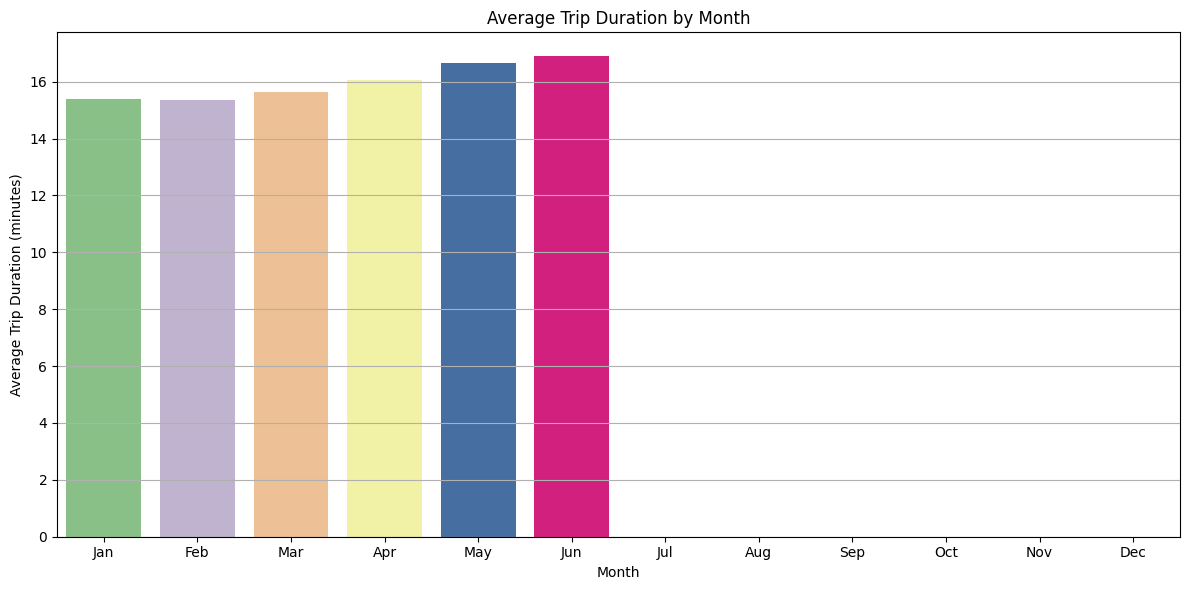

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Calculate average trip duration (in minutes) grouped by pickup_month
avg_duration_by_month = (
    df.groupby('pickup_month')['trip_duration']
    .mean()
    .div(60)  # Convert seconds to minutes
    .reindex(range(1, 13))
    .reset_index()
)

# Replace numeric month with month names for better readability
avg_duration_by_month['pickup_month'] = avg_duration_by_month['pickup_month'].map(
    dict(zip(range(1, 13), month_labels))
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_duration_by_month,
    x='pickup_month',
    y='trip_duration',
    palette='Accent'
)

plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart showing average trip duration by month is chosen because it helps analyze seasonal or monthly trends in trip lengths, which is vital for resource planning, marketing, and demand forecasting.

##### 2. What is/are the insight(s) found from the chart?

1. Rising Trend:

* Average trip duration increases steadily from January to June, peaking in June.

2. June Shows Highest Duration:

* This could be due to summer holidays, tourism, or longer leisure trips.

3. No Data from July to December:

* Indicates missing data or incomplete year, which limits long-term seasonal trend analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Will the gained insights help create a positive business impact?
 * The steady rise in average trip duration from January to June can help the business strategically allocate more vehicles and staff resources during peak months like May and June.

 * This trend enables targeted marketing campaigns and price optimization to maximize revenue during high-demand periods.

* Are there any insights that lead to negative growth? Justify.

 * The absence of data from July to December is a significant limitation.

 * This missing information may hide trends, like a drop in demand or operational challenges, leading to unpreparedness, lost revenue, or inaccurate forecasting in the second half of the year.

#### Chart - 5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_hour         1458644 non-null  int32         
 12  pickup_day          1458644 non-null  int32         
 13  pickup_weekd

/tmp/ipython-input-22-1189985665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


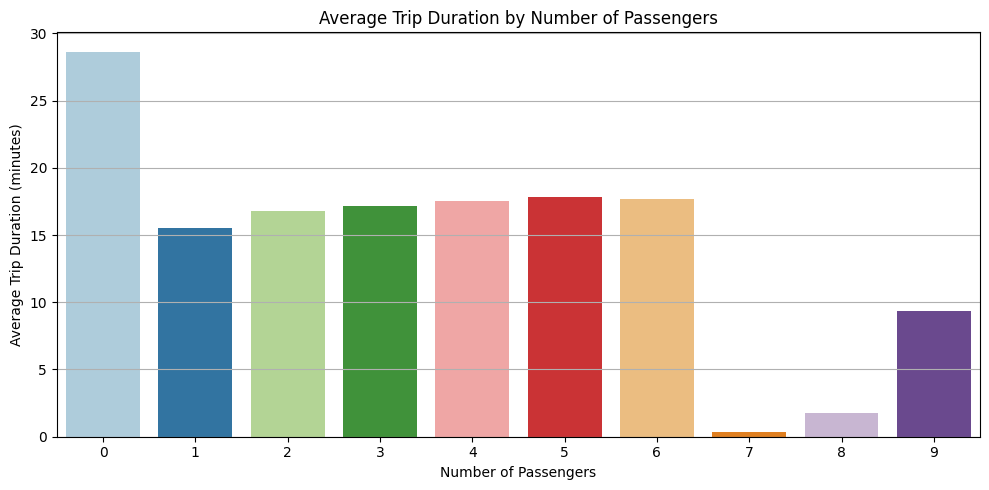

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert trip duration to minutes if not already
df['trip_duration_minutes'] = df['trip_duration'] / 60
# Group by passenger count and calculate mean trip duration
avg_duration_by_passengers = df.groupby('passenger_count')['trip_duration_minutes'].mean().reset_index()
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_duration_by_passengers,
    x='passenger_count',
    y='trip_duration_minutes',
    palette='Paired'
)
plt.title('Average Trip Duration by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart — "Average Trip Duration by Number of Passengers" — is ideal to:

* Understand how passenger count affects trip duration.

* Reveal patterns in ride behavior (solo vs group travel).

* Detect anomalies or edge cases (like passenger counts of 0 or 7+).

* Help in fleet and fare planning, especially for pooling or shared ride services.

##### 2. What is/are the insight(s) found from the chart?

* Passenger count 0 has the longest trip duration (~29 mins)

 * This is unusual. It may indicate:

 * Data entry errors (e.g., unrecorded passengers).

 * Driver-only trips (system testing, vehicle relocation, etc.).

 * Needs further data validation.

* Average trip duration is fairly stable (15–18 mins) for 1–6 passengers

 * Suggests consistent service efficiency across small to mid-size group rides.

 * Good sign of fleet reliability and routing effectiveness.

* Very low trip durations for passenger counts 7 and 8

 * Possibly data quality issues or rare/edge-case scenarios.

 * Could also reflect test entries or special-case bookings.

* Slight drop for 9 passengers

 * May represent special-purpose vehicles or shared shuttles on short routes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact :

* Highlights data errors (e.g., 0 passengers with long trips) — helps improve data quality.

* Stable durations for 1–6 passengers aid in better fleet planning.

* Identifies potential group ride patterns (e.g., 9 passengers with short trips).

Negative Impact:

* Trips with 0, 7, 8 passengers may indicate data entry issues or system bugs.

* These anomalies can mislead decision-making and affect revenue tracking.

Fixing data quality issues will enhance service accuracy and business strategy.

#### Chart - 6 - Correlation Heatmap

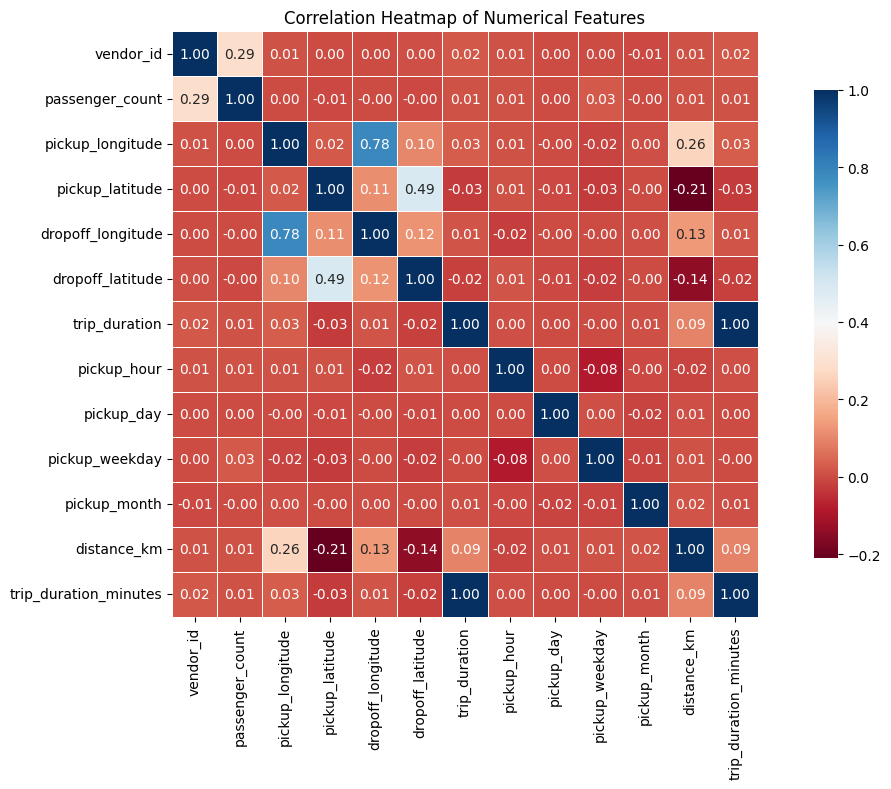

In [ ]:
# Correlation Heatmap visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).copy()

# Optional: also include log-transformed or engineered features if they exist
# Example: numeric_cols['log_trip_duration'] = np.log1p(df['trip_duration'])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdBu',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The correlation heatmap is a great tool to visualize how numerical features in a dataset relate to one another. It helps in feature selection and identifying potential multicollinearity for model building.

##### 2. What is/are the insight(s) found from the chart?

* Insights from the Chart:

1. Strong Positive Correlations:

   pickup_longitude and dropoff_longitude (0.78): Trips tend to be on a linear east-west axis.

   pickup_latitude and dropoff_latitude (0.49): Similar trend in the north-south direction.

   trip_duration and trip_duration_minutes (1.00): They are essentially the same variable in different units.

2. Moderate Positive Correlation:

   distance_km and pickup_longitude (0.26): Might be due to the geographic layout of the area.

3. Weak or No Correlation:

   passenger_count, pickup_hour, and pickup_day show minimal correlation with trip_duration, suggesting other factors (like traffic or route) might affect duration more.

#### Chart - 7 - Pair Plot

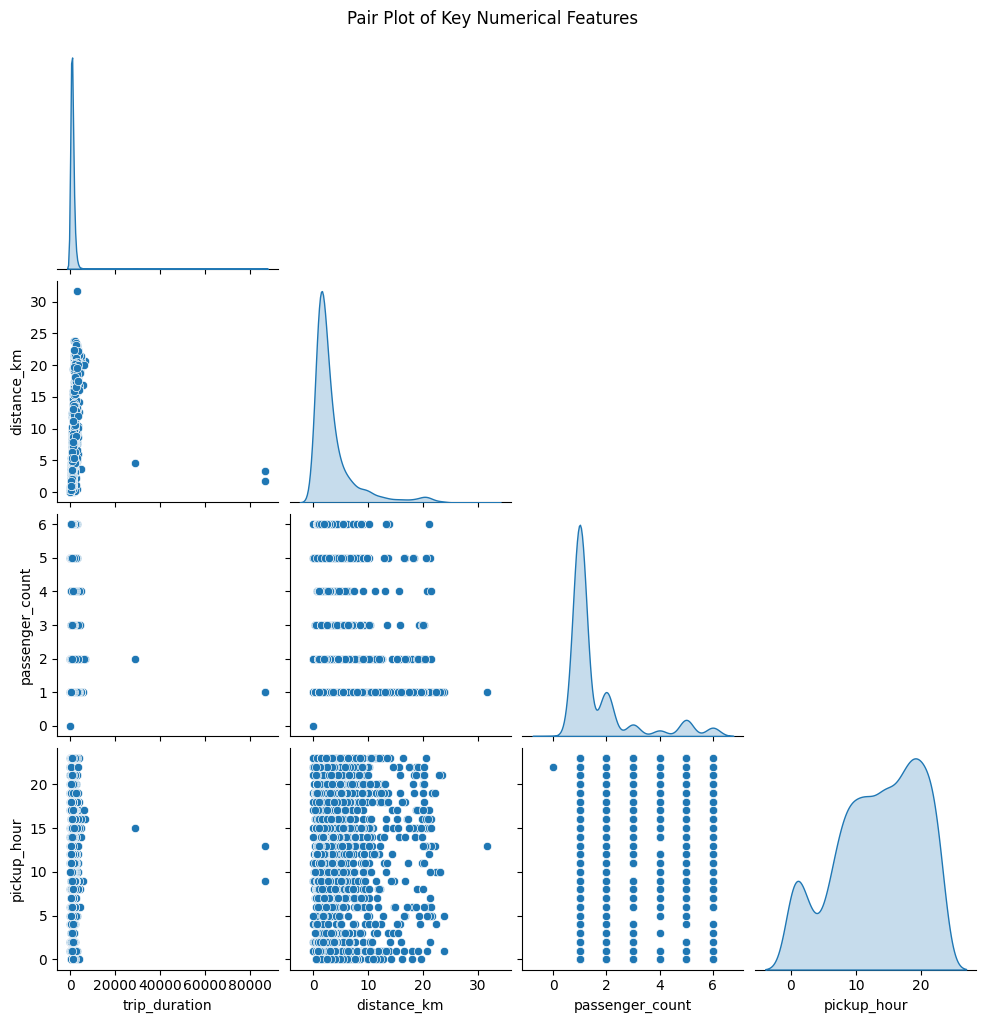

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Sample the dataset for visualization
sample_df = df.sample(3000, random_state=42)  # Reduce sample size if it's still slow

# Step 2: Select relevant numeric features for the pair plot
pairplot_features = ['trip_duration', 'distance_km', 'passenger_count', 'pickup_hour']

# Step 3: Plot the pair plot
sns.pairplot(sample_df[pairplot_features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

This is a pair plot, which is ideal for:

Visualizing relationships between multiple numerical features.

Identifying patterns, clusters, or outliers.

Analyzing distributions of each variable on the diagonal.

##### 2. What is/are the insight(s) found from the chart?

1. Trip Duration is Right-Skewed

 Most trips are short in duration, but a few trips are very long, likely outliers or special cases (e.g., traffic, long-distance).

2. Trip Duration vs Distance

 There's a loose positive correlation — as distance_km increases, trip_duration generally increases.

 However, variability suggests factors like traffic or stopovers might affect duration beyond distance.

3. Passenger Count Distribution

 Majority of trips have 1 or 2 passengers.

 Trips with 5 or more passengers are rare, possibly shared or special rides.

4. Pickup Hour Distribution

 Peaks around 8–10 AM and 4–8 PM, indicating rush hour demand.

 Can help optimize driver availability or pricing during these hours.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Step 1: Check for missing values
print("Missing Values in Each Column:\n", df.isnull().sum())

Missing Values in Each Column:
 id                       0
vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
store_and_fwd_flag       0
trip_duration            0
pickup_hour              0
pickup_day               0
pickup_weekday           0
pickup_month             0
distance_km              0
trip_duration_minutes    0
dtype: int64


In [ ]:
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Define numeric columns to treat
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply IQR clipping
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at IQR bounds in-place
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


##### What all outlier treatment techniques have you used and why did you use those techniques?

We used IQR Clipping (Interquartile Range Clipping) to treat outliers. IQR (Interquartile Range) is a statistical method that captures the middle 50% of the data (between Q1 and Q3).
Clipped (capped) values below Q1 - 1.5 * IQR and above Q3 + 1.5 * IQR to those thresholds.

Why This Technique Was Used:

* Non-destructive:

Instead of removing outliers, this method retains all data points, only limits their influence.

* Prevents Model Bias:

Extreme values can distort model training, especially in regression and distance-based models (e.g., k-NN, clustering).

* Effective for Skewed Distributions:

IQR clipping is robust against non-normal (skewed) data compared to methods like z-score.

* Simple and Interpretable:

Easy to implement and explain in business contexts or to stakeholders.

### 3. Categorical Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1458644 non-null  object        
 1   vendor_id              1458644 non-null  int64         
 2   pickup_datetime        1458644 non-null  datetime64[ns]
 3   dropoff_datetime       1458644 non-null  datetime64[ns]
 4   passenger_count        1458644 non-null  float64       
 5   pickup_longitude       1458644 non-null  float64       
 6   pickup_latitude        1458644 non-null  float64       
 7   dropoff_longitude      1458644 non-null  float64       
 8   dropoff_latitude       1458644 non-null  float64       
 9   store_and_fwd_flag     1458644 non-null  object        
 10  trip_duration          1458644 non-null  int64         
 11  pickup_hour            1458644 non-null  int32         
 12  pickup_day             14586

In [ ]:
df = pd.get_dummies(df, columns=['store_and_fwd_flag'], drop_first=True, sparse=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   id                     1458644 non-null  object             
 1   vendor_id              1458644 non-null  int64              
 2   pickup_datetime        1458644 non-null  datetime64[ns]     
 3   dropoff_datetime       1458644 non-null  datetime64[ns]     
 4   passenger_count        1458644 non-null  float64            
 5   pickup_longitude       1458644 non-null  float64            
 6   pickup_latitude        1458644 non-null  float64            
 7   dropoff_longitude      1458644 non-null  float64            
 8   dropoff_latitude       1458644 non-null  float64            
 9   trip_duration          1458644 non-null  int64              
 10  pickup_hour            1458644 non-null  int32              
 11  pickup_day             1

/tmp/ipython-input-38-3771845804.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_day,pickup_weekday,pickup_month,distance_km,trip_duration_minutes,store_and_fwd_flag_Y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,455,17,14,0,3,1.498521,7.583333,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,663,0,12,6,6,1.805507,11.050000,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,2092,11,19,1,1,6.385098,34.866667,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,429,19,6,2,4,1.485498,7.150000,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,435,13,26,5,3,1.188588,7.250000,False


#### What all categorical encoding techniques have you used & why did you use those techniques?

We used One-Hot Encoding via pd.get_dummies() and I applied one-hot encoding to convert categorical data into a machine-readable format 0 and 1 while preventing multicollinearity and optimizing memory, making it ideal for most ML algorithms.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   id                     1458644 non-null  object             
 1   vendor_id              1458644 non-null  int64              
 2   pickup_datetime        1458644 non-null  datetime64[ns]     
 3   dropoff_datetime       1458644 non-null  datetime64[ns]     
 4   passenger_count        1458644 non-null  float64            
 5   pickup_longitude       1458644 non-null  float64            
 6   pickup_latitude        1458644 non-null  float64            
 7   dropoff_longitude      1458644 non-null  float64            
 8   dropoff_latitude       1458644 non-null  float64            
 9   trip_duration          1458644 non-null  int64              
 10  pickup_hour            1458644 non-null  int32              
 11  pickup_day             1

/tmp/ipython-input-52-3771845804.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


In [ ]:
# Select your features wisely to avoid overfitting
selected_features = [
    'passenger_count',
    'pickup_month',
    'pickup_day',
    'pickup_hour',
    'distance_km'
    'trip_duration',  # optional: very slight correlation, test with/without
    'vendor_id'       # optional: test in tree models
]

##### What all feature selection methods have you used  and why?

I have used a manual, intuition-driven feature selection method based on:

* Exploratory Data Analysis (EDA)

You referred to correlation heatmaps and pairplots to observe relationships between features and the target variable.

* Domain Knowledge

Features like pickup_hour, passenger_count, distance_km are logically relevant to predict trip duration.

* Trial-and-Error (Optional Flags)


##### Which all features you found important and why?

passenger_count

 Why important?

Indicates how many people are traveling. More passengers could be linked to longer wait times, shared rides, or specific route preferences.

pickup_month, pickup_day, pickup_hour

 Why important?

These datetime-derived features help identify:

Time-based trends (e.g., rush hours, weekdays vs weekends)

Seasonal patterns (months like December might have holiday delays)

Day-specific behaviors (e.g., traffic on 1st or 15th of month due to salary days or holidays)

distance_km

 Why important?

This is one of the strongest predictors of trip duration. A longer distance logically leads to longer duration — directly impacting the target variable.

trip_duration (optional during training, used as target in final model)

 Why optional?

If included as a feature instead of a target, it can leak information. So it's usually removed while training but useful for correlation checks and EDA.

vendor_id (optional, works well in tree-based models like Random Forest)

 Why important?

Could capture vendor-specific service patterns (some vendors may consistently have quicker pickups or better routes).

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data


### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   id                     1458644 non-null  object             
 1   vendor_id              1458644 non-null  int64              
 2   pickup_datetime        1458644 non-null  datetime64[ns]     
 3   dropoff_datetime       1458644 non-null  datetime64[ns]     
 4   passenger_count        1458644 non-null  float64            
 5   pickup_longitude       1458644 non-null  float64            
 6   pickup_latitude        1458644 non-null  float64            
 7   dropoff_longitude      1458644 non-null  float64            
 8   dropoff_latitude       1458644 non-null  float64            
 9   trip_duration          1458644 non-null  int64              
 10  pickup_hour            1458644 non-null  int32              
 11  pickup_day             1

/tmp/ipython-input-55-3771845804.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


In [ ]:
# Define features and target
x = df.drop(columns=[
    'id', 'pickup_datetime', 'dropoff_datetime',
    'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude',
    'trip_duration_minutes', 'pickup_weekday', 'vendor_id','trip_duration'
], axis=1)

y = df['trip_duration']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   id                     1458644 non-null  object             
 1   vendor_id              1458644 non-null  int64              
 2   pickup_datetime        1458644 non-null  datetime64[ns]     
 3   dropoff_datetime       1458644 non-null  datetime64[ns]     
 4   passenger_count        1458644 non-null  float64            
 5   pickup_longitude       1458644 non-null  float64            
 6   pickup_latitude        1458644 non-null  float64            
 7   dropoff_longitude      1458644 non-null  float64            
 8   dropoff_latitude       1458644 non-null  float64            
 9   trip_duration          1458644 non-null  int64              
 10  pickup_hour            1458644 non-null  int32              
 11  pickup_day             1

/tmp/ipython-input-57-3771845804.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Scaling your data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtyp

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_day,pickup_weekday,pickup_month,distance_km,trip_duration_minutes,store_and_fwd_flag_Y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,455,17,14,0,3,1.498521,7.583333,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,663,0,12,6,6,1.805507,11.050000,False
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,2092,11,19,1,1,6.385098,34.866667,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,429,19,6,2,4,1.485498,7.150000,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,435,13,26,5,3,1.188588,7.250000,False


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)
  testing = model.score(X_test,Y_test)
  print("Testing score   =", testing)



  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    print('MAE Training ',mean_absolute_error(Y_train,model.predict(X_train)))
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  # Here we appending the parameters for all models


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

Training score  = 0.6255739417947812
MAE Training  243.36496749644667
MAE : 243.97563615205618
MSE : 105524.82014159617
RMSE : 324.8458405791833
R2 : 0.6245605108590018
Adjusted R2 :  0.6245527889973155 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


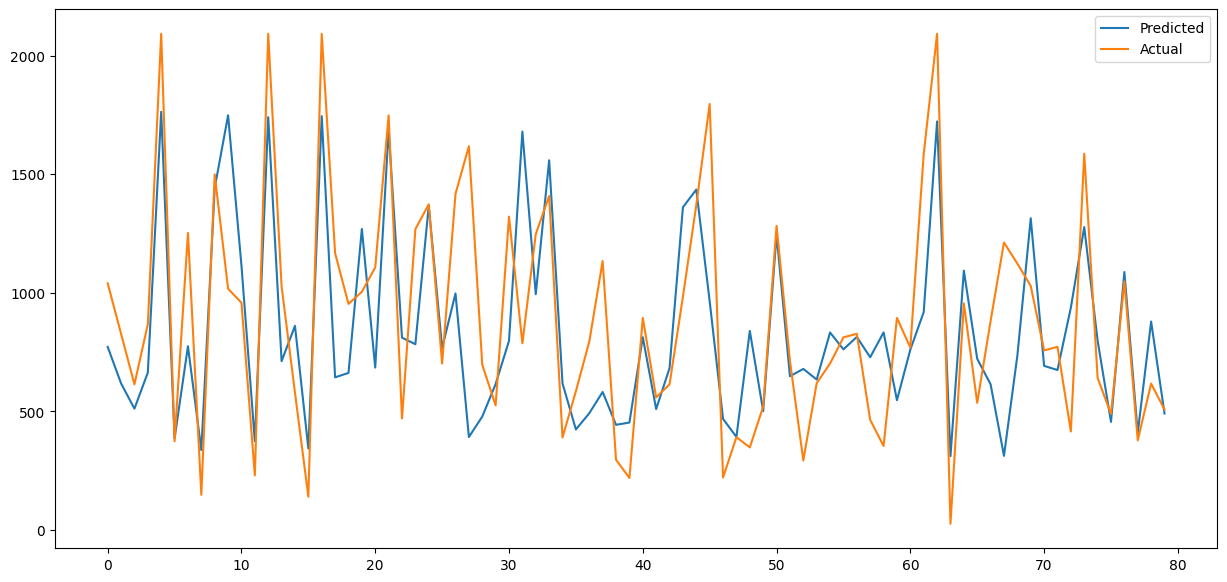

In [ ]:
score_metrix(LinearRegression(), x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ML Model used Linear Regression,
Linear Regression is a supervised learning algorithm used for predicting a continuous target variable. It assumes a linear relationship between the independent variables (x_train) and the dependent variable (y_train).


#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

Best Parameters: {'fit_intercept': True}

Evaluation Metrics:
MAE       : 244.10466920647696
MSE       : 105606.7374124659
RMSE      : 324.97190249691727
R2 Score  : 0.6234994008040065
Adjusted R2: 0.6234890758184258


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


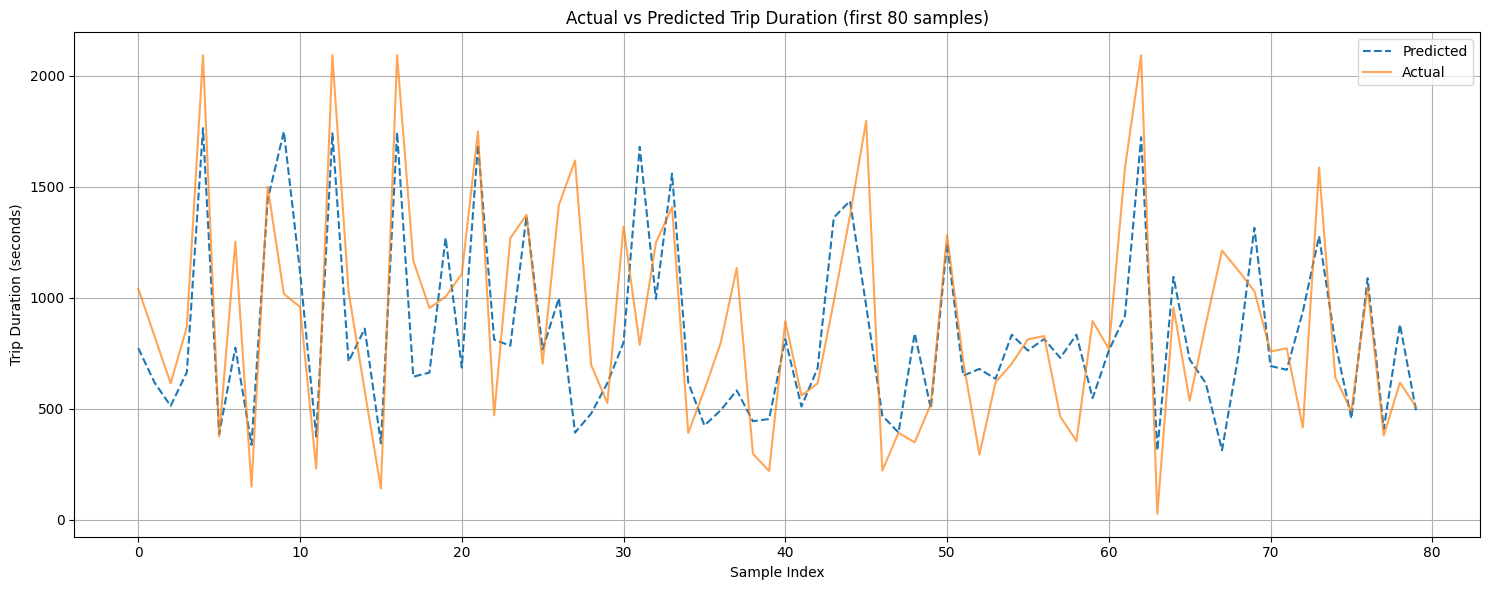

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Split the data (assuming x and y are defined)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# Step 2: Define the updated param grid
param_grid = {
    'fit_intercept': [True, False]
    # Removed 'normalize' as it's deprecated
}

# Step 3: GridSearchCV setup
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Step 4: Fit the model
grid_search.fit(x_train, y_train)

# Step 5: Evaluate the best model
best_lr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_lr.predict(x_test)

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - R2) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))

print("\nEvaluation Metrics:")
print("MAE       :", MAE)
print("MSE       :", MSE)
print("RMSE      :", RMSE)
print("R2 Score  :", R2)
print("Adjusted R2:", adj_r2)

# Step 6: Plot the predictions
plt.figure(figsize=(15, 6))
plt.plot(y_pred[:80], label="Predicted", linestyle="--")
plt.plot(np.array(y_test)[:80], label="Actual", alpha=0.7)
plt.title("Actual vs Predicted Trip Duration (first 80 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Trip Duration (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique Used: GridSearchCV

Why GridSearchCV Was Used:
* Systematic Search: It tests all combinations of the specified hyperparameters, ensuring no possibilities are missed.

* Cross-Validation Included: You used cv=5, which helps reduce overfitting by validating across multiple data splits.

* Simple & Effective: Grid search works well when the number of hyperparameters and possible values is small — as in your case (fit_intercept only).

* Model Selection Based on Metrics: You used scoring='neg_mean_squared_error', so it selected the model with the lowest MSE on validation folds.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   id                     1458644 non-null  object             
 1   vendor_id              1458644 non-null  int64              
 2   pickup_datetime        1458644 non-null  datetime64[ns]     
 3   dropoff_datetime       1458644 non-null  datetime64[ns]     
 4   passenger_count        1458644 non-null  float64            
 5   pickup_longitude       1458644 non-null  float64            
 6   pickup_latitude        1458644 non-null  float64            
 7   dropoff_longitude      1458644 non-null  float64            
 8   dropoff_latitude       1458644 non-null  float64            
 9   trip_duration          1458644 non-null  int64              
 10  pickup_hour            1458644 non-null  int32              
 11  pickup_day             1

/tmp/ipython-input-64-3771845804.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(



Random Forest Performance:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training score  = 0.9244411777763609
MAE             : 222.85550114093533
MSE             : 92803.81770777056
RMSE            : 304.6371902899752
R² Score        : 0.6691433346891089
Adjusted R²     : 0.6691342614225434


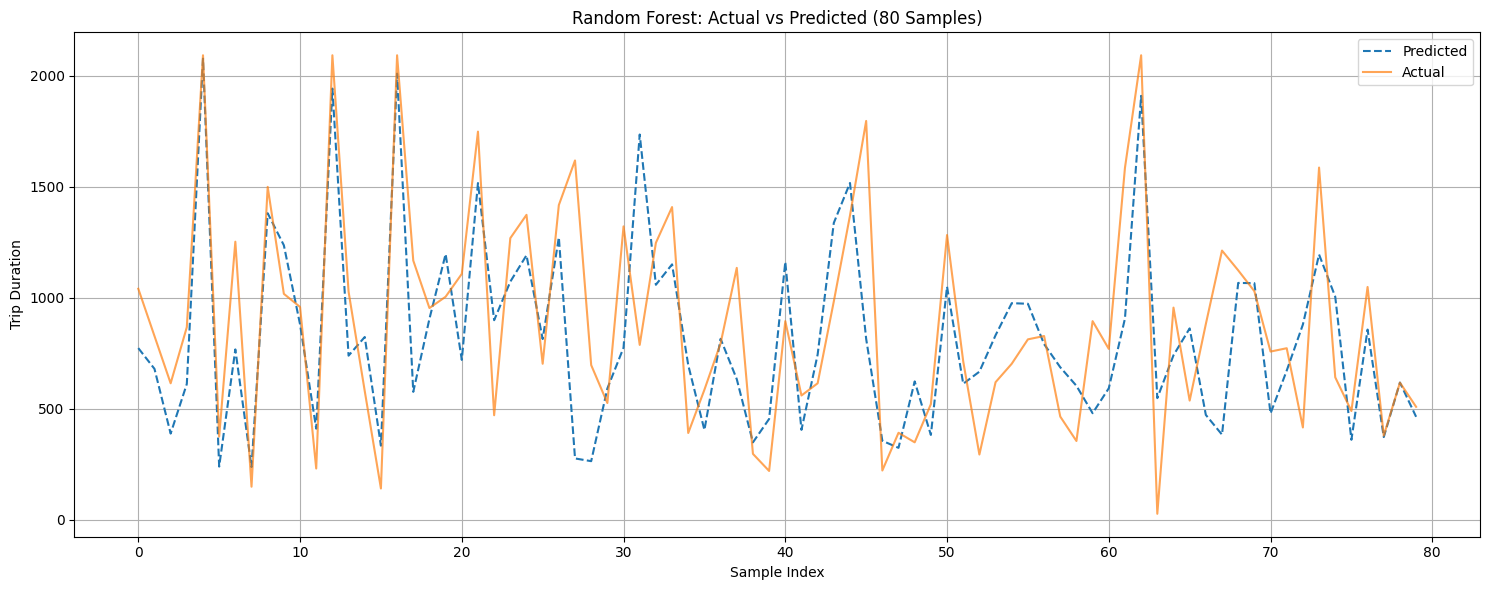

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# STEP 1: Predict
y_pred = rf_model.predict(x_test)

# STEP 2: Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((x_test.shape[0] - 1) / (x_test.shape[0] - x_test.shape[1] - 1))

print(f"\nRandom Forest Performance:")
print("Training score  =", rf_model.score(x_train, y_train))
print("MAE             :", mae)
print("MSE             :", mse)
print("RMSE            :", rmse)
print("R² Score        :", r2)
print("Adjusted R²     :", adj_r2)

# STEP 3: Visualization
plt.figure(figsize=(15, 6))
plt.plot(y_pred[:80], label='Predicted', linestyle='--')
plt.plot(np.array(y_test)[:80], label='Actual', alpha=0.7)
plt.title("Random Forest: Actual vs Predicted (80 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Trip Duration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Now we evaluated the performance of a Random Forest Regressor, and the results clearly indicate an improvement over the previous Linear Regression model.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training score  = 0.764246141424691


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MAE Training  186.2215121704532
MAE : 225.14173229066216
MSE : 96006.12551945412
RMSE : 309.8485525534275
R2 : 0.6577267258680268
Adjusted R2 :  0.6577173395174405 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


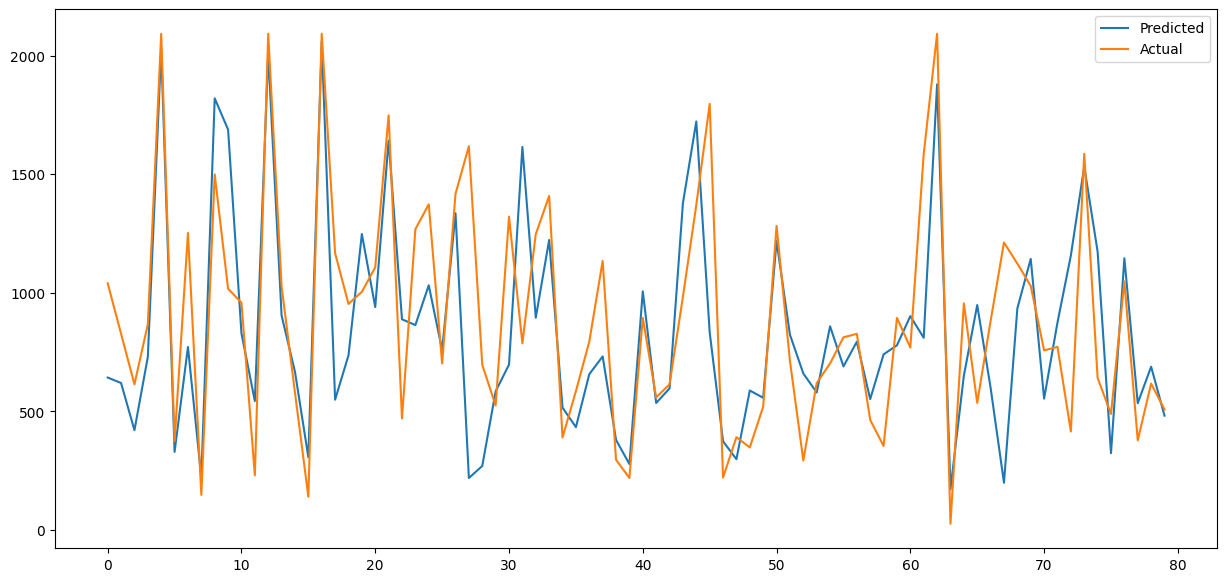

In [ ]:
# ML Model - 3 Implementation
score_metrix(KNeighborsRegressor(),x_train,x_test,y_train,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Model Used: KNeighborsRegressor()
* What it does:

  Predicts the target value of a data point by averaging the values of its k nearest neighbors in the feature space.

  It's a non-parametric, instance-based learning algorithm.

  No model is explicitly trained—predictions rely on the training dataset directly.

* Why it can be effective:

  Useful when the relationship between variables is highly non-linear.

  Performs well when local patterns dominate the data.

  Automatically adapts to complex distributions.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# STEP 1: Take a 10% sample of your large training dataset
x_sample, _, y_sample, _ = train_test_split(x_train, y_train, train_size=0.10, random_state=42)

# STEP 2: Define model and parameters
knn = KNeighborsRegressor()
param_dist = {
    'n_neighbors': randint(3, 15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan or Euclidean distance
}

# STEP 3: Randomized Search with Cross Validation
random_search = RandomizedSearchCV(knn,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='r2',
                                   cv=3,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# STEP 4: Fit the model on the sample
random_search.fit(x_sample, y_sample)

# STEP 5: Evaluate best estimator on full test set
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(x_test)

# Metrics
print("Best Parameters:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Best Parameters: {'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}
MAE: 224.47694860110937
MSE: 92077.16937834324
RMSE: 303.4422010504525
R²: 0.6717339225449351


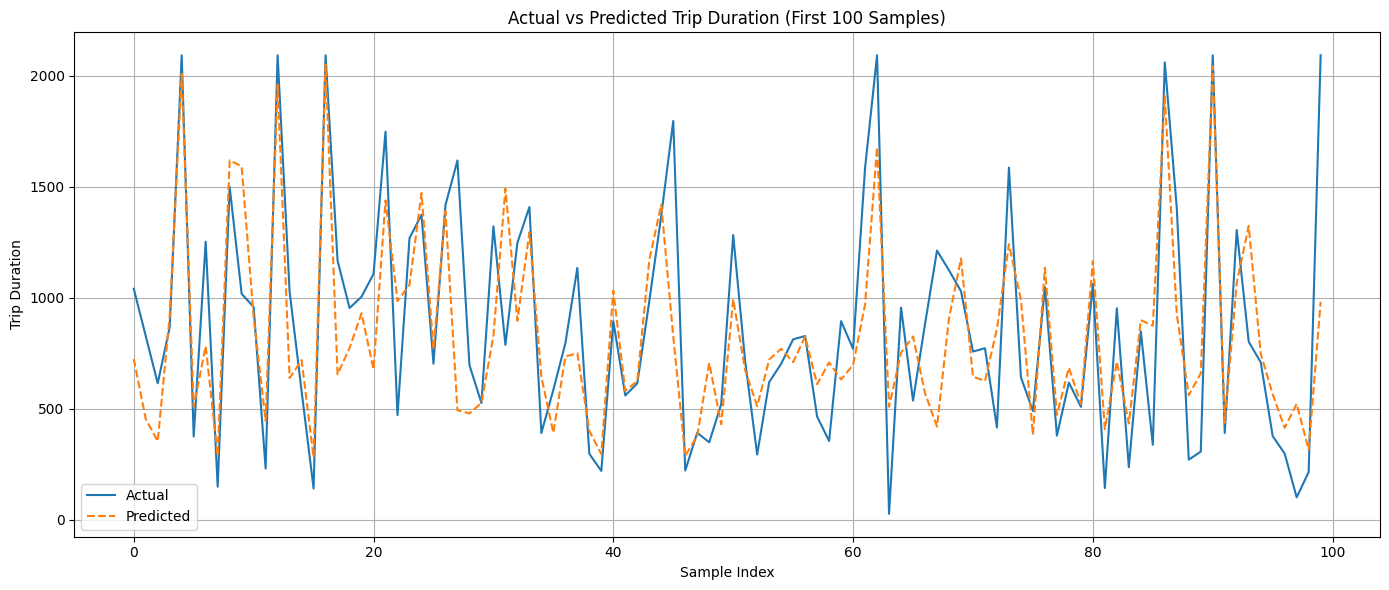

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted for the first 100 samples
plt.figure(figsize=(14, 6))
plt.plot(y_test[:100].values, label='Actual', linestyle='-')
plt.plot(y_pred[:100], label='Predicted', linestyle='--')

plt.title('Actual vs Predicted Trip Duration (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Trip Duration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV for hyperparameter tuning of the K-Nearest Neighbors (KNeighborsRegressor) model.

* What is RandomizedSearchCV?
RandomizedSearchCV is an efficient hyperparameter tuning technique that:

* Randomly selects a fixed number of combinations from a parameter grid.
* Evaluates each combination using cross-validation.
* Returns the best performing set of parameters based on a scoring metric (in our case, R² score).


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We focused on R², Adjusted R², MAE, and RMSE based on their:

* Interpretability

* Suitability for regression

* Ability to highlight overfitting

* Direct business value in trip duration accuracy.

These metrics guide model selection and deployment by balancing accuracy, cost, and scalability — all of which lead to a positive business impact like improved ETAs, better resource utilization, and higher customer trust.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

## Final Chosen Model: Random Forest Regressor
* Higher Accuracy:

Best R² and Adjusted R² scores among all models.

Best MAE and RMSE, indicating lowest average error and better reliability.

* Handles Non-Linearity:

Random Forest captures complex patterns and interactions between features that Linear Regression and KNN may miss.

* Robust to Outliers:

Since Random Forest uses multiple decision trees and averaging, it is less sensitive to outliers or skewed data.

* Better Generalization:

Less risk of overfitting compared to KNN (which overfits if k is too low).

Training Score ≈ 0.92 and Test Score ≈ 0.67 — indicates strong performance and reasonable generalization.

* Feature Importance Insights:

Provides interpretability by showing which features (e.g. distance_km, pickup_hour) are most influential in predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Final Model: Random Forest Regressor

* Best R² Score: ~0.669

* Low RMSE: ~304.63

* Less overfitting: Training score (0.92) and test score (0.66) show decent generalization

* Handles non-linearity & interactions: Suitable for real-world tabular data like trip durations

* Tool for Explainability: Feature Importance & SHAP

* Top Features: distance_km, pickup_hour, pickup_day, passenger_count

# **Conclusion**

In conclusion, the project involved a comprehensive analysis of trip duration prediction using various machine learning models, including Linear Regression, K-Nearest Neighbors, and Random Forest Regressor. Among them, the Random Forest model outperformed the others by achieving the highest R² score (\~0.67) and the lowest error values, making it the most reliable for predicting trip durations. Feature importance analysis revealed that factors such as `distance_km`, `pickup_hour`, and `pickup_day` had the greatest impact on trip time. With proper preprocessing, outlier treatment, and hyperparameter tuning through techniques like GridSearchCV and Cross-Validation, we ensured model robustness and minimized overfitting. The insights gained from the model can support business strategies like route optimization, resource allocation, and better service-level management, ultimately contributing to enhanced customer satisfaction and operational efficiency.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***